<a href="https://colab.research.google.com/github/rodrigosouza07/Dashboards/blob/master/perda_taruma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [5]:
tabela = pd.read_excel("PERDA TARUMA.xlsx")
tabela.head()

,estoque_analitico_idsubproduto,Descrição do Produto,secao_descrsecao,grupo_descrgrupo,subgrupo_descrsubgrupo,Quantidade,Total Líquido
0,12864,ASA FRANGO BDJ SADIA 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,16.0,233.60
1,102007,CORACAO SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,5.0,128.55
2,102005,COXAS SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,3.0,36.09
3,101998,COXAS SADIA SCH 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,15.0,136.20
4,102012,COXINHA DA ASA SADIA DRUMETT 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,12.0,169.92


In [8]:
tabela = tabela.rename(columns={"PERDA TARUMA": "PERDA", "estoque_analitico_idsubproduto" : "Id", "secao_descrsecao" : "Seção",
                        "grupo_descrgrupo" : "grupo",
                        "subgrupo_descrsubgrupo" : "Subgrupo"})
tabela.head()

,Id,Descrição do Produto,Seção,grupo,Subgrupo,Quantidade,Total Líquido
0,12864,ASA FRANGO BDJ SADIA 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,16.0,233.60
1,102007,CORACAO SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,5.0,128.55
2,102005,COXAS SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,3.0,36.09
3,101998,COXAS SADIA SCH 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,15.0,136.20
4,102012,COXINHA DA ASA SADIA DRUMETT 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,12.0,169.92


In [9]:
tabela.groupby(["Seção", "grupo", "Subgrupo"]).sum()
tabela.head()

,Id,Descrição do Produto,Seção,grupo,Subgrupo,Quantidade,Total Líquido
0,12864,ASA FRANGO BDJ SADIA 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,16.0,233.60
1,102007,CORACAO SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,5.0,128.55
2,102005,COXAS SADIA BDJ 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,3.0,36.09
3,101998,COXAS SADIA SCH 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,15.0,136.20
4,102012,COXINHA DA ASA SADIA DRUMETT 1KG,ACOUGUE,AÇOUGUE FRANGO,FRANGO BANDEJA,12.0,169.92


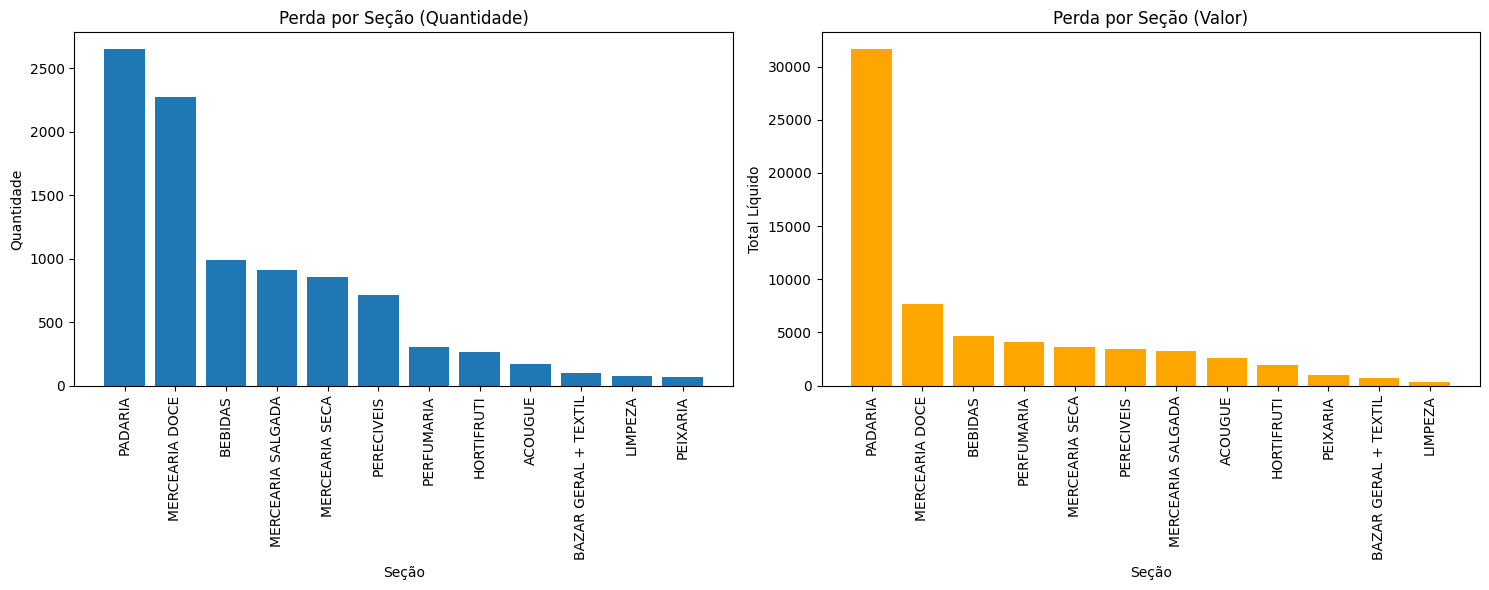

In [10]:
import matplotlib.pyplot as plt

# Group by section and sum Quantity and Total Líquido
perda_por_secao = tabela.groupby("Seção").agg({"Quantidade": "sum", "Total Líquido": "sum"})

# Sort by Quantity and Total Líquido for visualization
perda_por_secao_sorted_quantidade = perda_por_secao.sort_values("Quantidade", ascending=False)
perda_por_secao_sorted_valor = perda_por_secao.sort_values("Total Líquido", ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Quantity
axes[0].bar(perda_por_secao_sorted_quantidade.index, perda_por_secao_sorted_quantidade["Quantidade"])
axes[0].set_title("Perda por Seção (Quantidade)")
axes[0].set_xlabel("Seção")
axes[0].set_ylabel("Quantidade")
axes[0].tick_params(axis='x', rotation=90)

# Plot Total Líquido
axes[1].bar(perda_por_secao_sorted_valor.index, perda_por_secao_sorted_valor["Total Líquido"], color='orange')
axes[1].set_title("Perda por Seção (Valor)")
axes[1].set_xlabel("Seção")
axes[1].set_ylabel("Total Líquido")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()